Tasks:
* How does food production impacts environment
*	Which types of food have more negative impact on the environment?
*	What types of food production has less emission and should be encouraged to consume nutritious diet in a sustainable   way?
*	Which stage of food production contributes more to the greenhouse gas emmision?
*	Compare carbon footprint of plant-based, animal-based and protein-rich foods?



# import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
# show all rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)

# Load Data


In [3]:
# data1 = data1.sort_values("Total Environmental Impact", ascending=False).iloc[:,:8]
# data1.head(10)

In [4]:
data = pd.read_csv("Food_Production.csv")

#looking at the dataset
data.shape
data.head(5)  

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


# Data Cleaning, Exploration and transformation

There are 23 columns and 43 entries. We can see that data on emissions for each step of production and total emissions are present for all food products, while there are null values for the additional environmental indicators.

There is one spelling error ('Packging') and several columns with very articulate names. We will change the labels and then look at this section for reference regarding what is contained in each variable and its unit of measure.

<!-- Renaming columns  -->

In [5]:
#rename colomns
data.rename(columns = {'Packging': 'Packaging'}, inplace = True)
data.rename(columns = {'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)': 'Eutrophying Kcal',
'Eutrophying emissions per kilogram (gPO₄eq per kilogram)': 'Eutrophying kg', 
'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)': 'Eutrophying protein',
'Freshwater withdrawals per 1000kcal (liters per 1000kcal)': 'Freshwater kcal',
'Freshwater withdrawals per 100g protein (liters per 100g protein)': 'Freshwater protein',
'Freshwater withdrawals per kilogram (liters per kilogram)': 'Freshwater kg', 
'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)': 'GHG kcal',
'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)': 'GHG protein',
'Land use per 1000kcal (m² per 1000kcal)': 'Land kcal',
'Land use per kilogram (m² per kilogram)': 'Land kg',
'Land use per 100g protein (m² per 100g protein)': 'Land protein',
'Scarcity-weighted water use per kilogram (liters per kilogram)': 'Scarcity water kg',
'Scarcity-weighted water use per 100g protein (liters per 100g protein)': 'Scarcity water protein',
'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)': 'Scarcity water kcal'}, inplace=True)

In [6]:
# setting the Food product column as index
data.set_index('Food product', inplace=True)

In [7]:
# Replacing the null values with 0
data = data.fillna(0)

1. Which types of food have more impact on the environment?

In [8]:
# data.set_index('Food product', inplace=True)
# more_impact.set_index('Food product', inplace=True)

data = data.reset_index('Food product', inplace=False)
more_impact = data[['Food product','Total_emissions']].sort_values('Total_emissions', ascending=False).head(10).copy()
more_impact =  more_impact.set_index('Food product', inplace=False)
more_impact = more_impact.sort_values('Total_emissions', ascending=True).copy()
more_impact

,Total_emissions
Food product,
Poultry Meat,6.1
Pig Meat,7.2
Palm Oil,7.6
Shrimps (farmed),11.8
Coffee,16.5
Dark Chocolate,18.7
Beef (dairy herd),21.1
Cheese,21.2
Lamb & Mutton,24.5


<Axes: title={'center': 'Food with more environmental impact'}, xlabel='GHG Emissions', ylabel='Food product'>

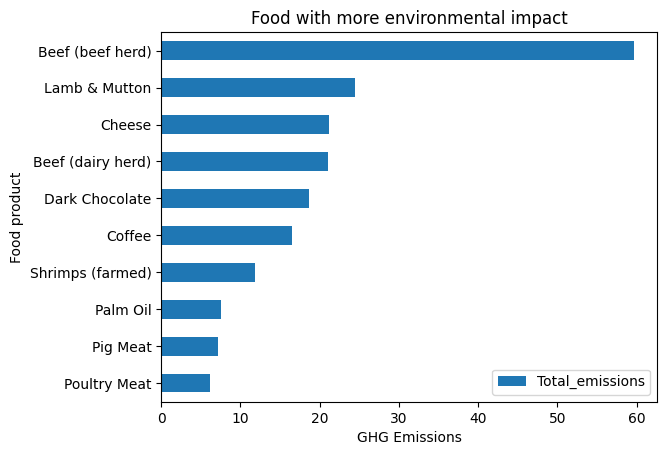

In [9]:
#Removing the Index
# negative_impact = negative_impact.reset_index(drop = True)

#Visualization 
more_impact.plot(kind="barh", stacked=True, title='Food with more environmental impact', xlabel='GHG Emissions')


In [10]:
# Food with very less impact
less_impact = data[['Food product', 'Total_emissions']].sort_values('Total_emissions', ascending=True).head(10).copy()
less_impact.set_index('Food product', inplace=True)
less_impact

,Total_emissions
Food product,
Nuts,0.2
Onions & Leeks,0.3
Citrus Fruit,0.3
Root Vegetables,0.3
Potatoes,0.3
Apples,0.3
Brassicas,0.4
Other Vegetables,0.5
Other Fruit,0.7


<Figure size 1000x500 with 0 Axes>

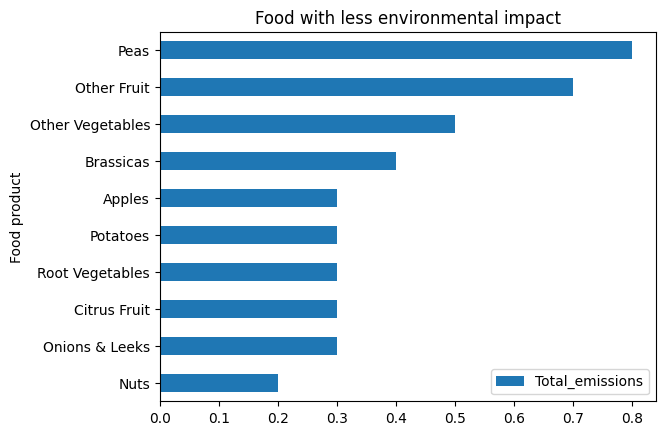

In [31]:
#Visualization 
fig2 = plt.figure(figsize=(10,5))
less_impact.plot(kind="barh", stacked=True, title='Food with less environmental impact' )
fig2.savefig("bar2.jpeg")

In [12]:
# cropbased food with negative impacts on environment most esp land use
negative_impact = data[data['Land use change'] < 0].iloc[:,:2].sort_values('Land use change', ascending=True)

# negative_impact.set_index('Food product', inplace=True)
negative_impact

,Food product,Land use change
11,Nuts,-2.1
19,Olive Oil,-0.4
25,Citrus Fruit,-0.1
29,Wine,-0.1


Text(0.5, 1.0, 'Negative impact on environment')

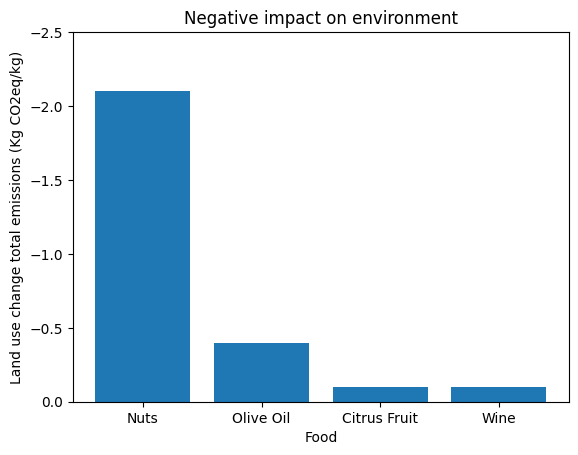

In [13]:
plt.bar(data=negative_impact, x='Food product', height='Land use change')
plt.ylim(0,-2.5)
plt.xlabel('Food')
plt.ylabel('Land use change total emissions (Kg CO2eq/kg)')
plt.title('Negative impact on environment')

In [14]:
# plot

# fig, ax = plt.subplots(figsize = (5, 5))

# bar = negative_impact['Land use change'].plot( kind='bar',
# ylim = (0, -2.2),

# # doesnt make it to misbehave
# ax = ax,
# title = 'Negative Impact on land use change'
# )
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.set_ylabel('Total emissions (Kg CO2eq/kg)')
# ax.set_xlabel('Food')
# plt.show()

types of food production should be encouraged to consume nutritious diet in a sustainable way

In [15]:

# sorting the values of all the emissions by the foods on each step of production
FP_encouraged = data.sort_values('Total_emissions', ascending=True).iloc[:, :7]
FP_encouraged = FP_encouraged[FP_encouraged["Land use change"] <=0  ]
FP_encouraged.head()
FP_encouraged.set_index('Food product', inplace=True)


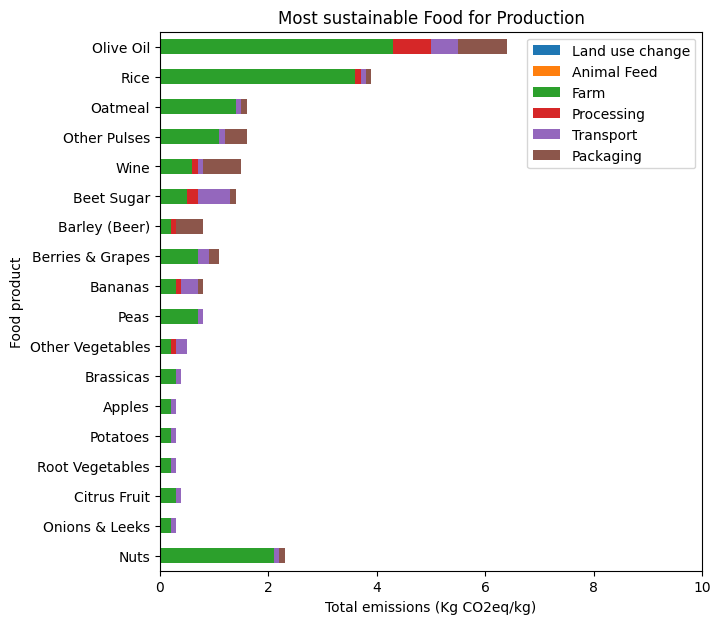

In [16]:
# plot
fig, ax = plt.subplots(figsize = (7 ,7))

# barplot of total emissions
bar = FP_encouraged.plot(kind = 'barh',
stacked = True,
xlim = (0, 10),

# doesnt make it to misbehave
ax = ax,
title = 'Most sustainable Food for Production'
)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlabel('Total emissions (Kg CO2eq/kg)')
plt.show()

stage of food production contributes more to the greenhouse gas emmision

In [17]:
#resets the index
food_prdt = data.reset_index()
#new dataFrame with long format
food_prdt = pd.melt(food_prdt, id_vars=['Food product'], value_vars=food_prdt.columns[:9], var_name='Stage', value_name='Emissions')
food_prdt = food_prdt.iloc[43:]
food_prdt

#Emmission for each production stage
tp = pd.DataFrame(food_prdt.groupby('Stage')['Emissions'].sum()/data['Total_emissions'].sum()*100)
tp

,Emissions
Stage,
Animal Feed,7.593458
Farm,58.099688
Land use change,21.105919
Packaging,4.517134
Processing,4.244548
Retail,1.168224
Transport,3.271028


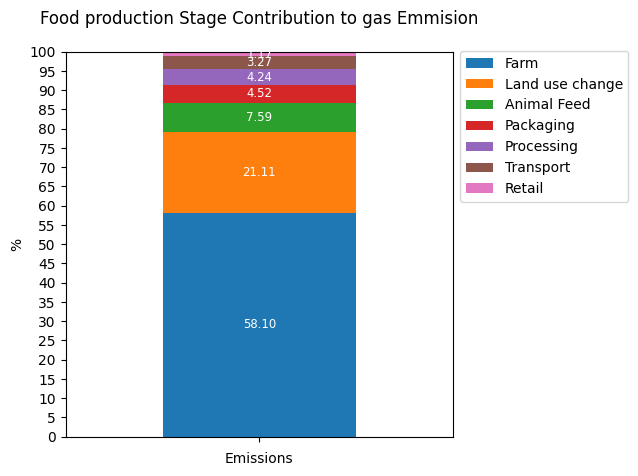

In [22]:
# plot
fig1, ax = plt.subplots(figsize=(5,5))

bar = tp.sort_values('Emissions', ascending=False).T.plot.bar(stacked=True,
ylim = (0,100),
ylabel = '%',
ax = ax)

# # Title , label and legend
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_title('Food production Stage Contribution to gas Emmision', pad=20)
ax.xaxis.set_ticklabels([])
ax.legend(bbox_to_anchor = (1,1.02))
ax.set_xlabel('Emissions')

# plt.bar_label(bar, labels=tp['Emissions'], label_type='center')
# #annotate bar
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.2f', color='white' ,size='small')

# plt.show()
# tp.plot(kind='bar', stacked=True, figsize=(6,6))
# plt.show
# tp.iloc[:6].sort_values('Emissions', ascending=False).T.plot(kind='bar', stacked=True, ylim = (0,100), ylabel = '%')
# plt.legend(bbox_to_anchor = (1,1.02))


In [23]:
fig1.savefig("starckedbar.jpeg")

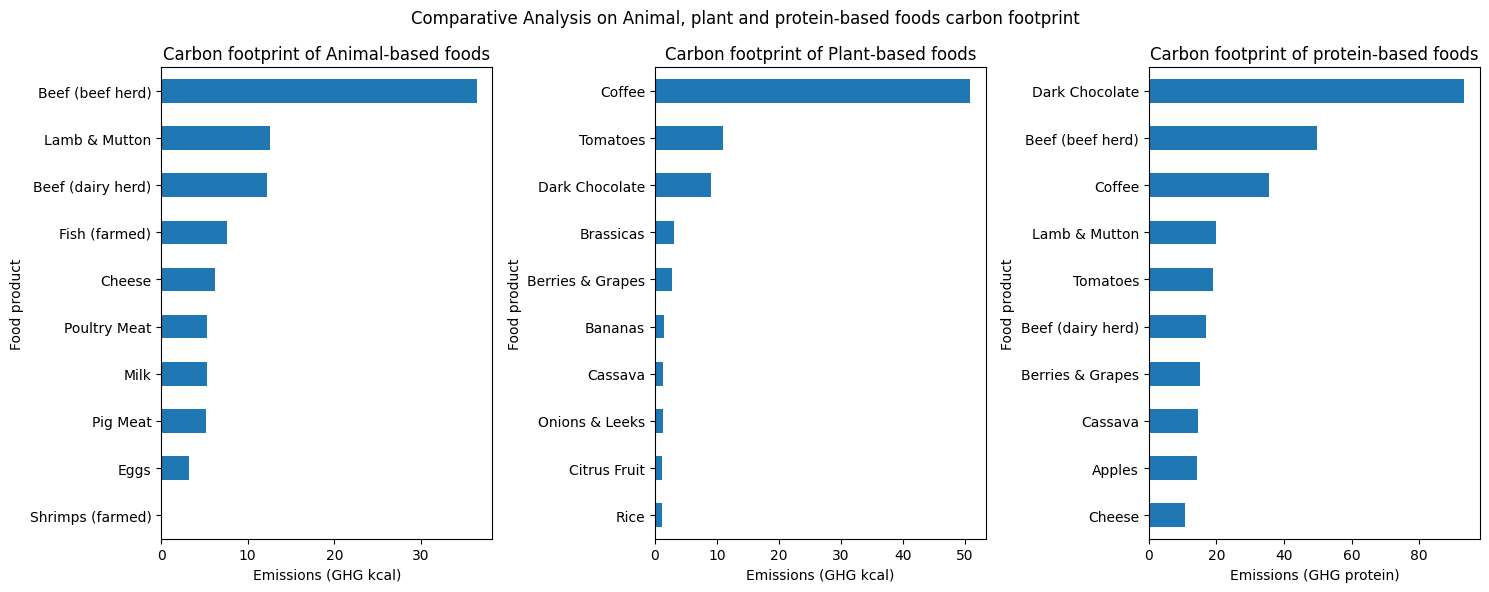

In [19]:
#Animal based food
carbon_f = data[['Food product','Animal Feed','GHG kcal','GHG protein']]
carbon_f.set_index('Food product', inplace=True)
animal = carbon_f[carbon_f['Animal Feed']>0]
a = animal['GHG kcal'].sort_values(ascending=True)

# Plant based Food
plant = carbon_f[carbon_f['Animal Feed']==0]
p = plant['GHG kcal'].sort_values(ascending=True).tail(10)

#protein
# carbon_f = data[['Animal Feed','GHG kcal','GHG protein']]
protein = carbon_f['GHG protein'].sort_values( ascending=True).tail(10)

# plot
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

a.plot(kind="barh", stacked=True, ax=ax[0], title='Carbon footprint of Animal-based foods' )
p.plot(kind="barh", stacked=True, ax=ax[1], title='Carbon footprint of Plant-based foods' )
protein.plot(kind="barh", stacked=True, ax=ax[2], title='Carbon footprint of protein-based foods' )

ax[0].set_xlabel('Emissions (GHG kcal)')
# ax[0].xaxis.set_major_locator(ticker.MultipleLocator(50))

ax[1].set_xlabel('Emissions (GHG kcal)')
# ax[1].xaxis.set_major_locator(ticker.MultipleLocator(50))

ax[2].set_xlabel('Emissions (GHG protein)')
# ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1000))

fig.suptitle('Comparative Analysis on Animal, plant and protein-based foods carbon footprint')
plt.tight_layout()